In [117]:
%matplotlib inline
import numpy as np

from sklearn import datasets
from sklearn import svm

Standard scikit-learn [tutorials](http://scikit-learn.org/stable/tutorial/index.html).

# [An introduction to machine learning with scikit-learn](http://scikit-learn.org/stable/tutorial/basic/tutorial.html)¶


## Data

In [3]:
iris = datasets.load_iris()

In [4]:
digits = datasets.load_digits()

In [5]:
digits.data.shape

(1797, 64)

In [8]:
digits.images[0].shape

(8, 8)

## Learning and predicting

In [14]:
clf = svm.SVC(gamma=1e-3, C=100.)

In [15]:
clf.fit(digits.data[:-1], digits.target[:-1])

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [17]:
clf.predict(digits.data[-1:])

array([8])

## Model presistence

In [18]:
clf = svm.SVC()

In [19]:
iris = datasets.load_iris()

In [20]:
X, y = iris.data, iris.target

In [21]:
clf.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [73]:
from sklearn.externals import joblib

In [24]:
joblib.dump(clf, 'demo_pickle.pkl')

['demo_pickle.pkl']

In [25]:
clf_2 = joblib.load('demo_pickle.pkl')

In [26]:
clf_2

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

## Conventions

### Type casting

#### Regression targets are cast to float64

In [41]:
X = np.array([1,2,3,4]).reshape(2, -1)
y = np.array([3, 7], dtype='int32').reshape(2, -1)
y.dtype
regr = svm.SVR()
regr.fit(X, y)
regr.predict(X).dtype

dtype('int32')

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

dtype('float64')

#### Classification targets are maintained

In [94]:
from sklearn import datasets
iris = datasets.load_iris()

In [95]:
X = iris.data
y_target = iris.target
y_name = iris.target_names[y_target]

In [49]:
clf = svm.SVC()

In [53]:
clf.fit(X, y_target)
pred = clf.predict(X)
pred[:3]

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

array([0, 0, 0])

In [54]:
clf.fit(X, y_name)
pred = clf.predict(X)
pred[:3]

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

array(['setosa', 'setosa', 'setosa'], 
      dtype='|S10')

### Refitting and updateing parameters

In [68]:
rng = np.random.RandomState(0)
X = rng.rand(100, 10)
y = rng.binomial(1, 0.5, 100)
X_test = rng.rand(5, 10)

The default kernel `rbf` is first changed to `linear` after the estimator has been constructed via `SVC()`, and changed back to `rbf` to refit the estimator and to make a second prediction.

In [69]:
clf = svm.SVC()
clf.set_params(kernel='linear').fit(X, y)
clf.predict(X_test)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

array([1, 0, 1, 1, 0])

In [70]:
clf.set_params(kernel='rbf').fit(X, y)
clf.predict(X_test)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

array([0, 0, 0, 1, 0])

### Mulitclass v.s. multilabel fitting

In [108]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import LabelBinarizer

In [109]:
X = [[1, 2], [2, 4], [4, 5], [3, 2], [3, 1]]
y = [0, 0, 1, 1, 2]

In [110]:
classif = OneVsRestClassifier(estimator=svm.SVC(random_state=0))
classif.fit(X, y).predict(X)

array([0, 0, 1, 1, 2])

In [111]:
y_lb = LabelBinarizer().fit_transform(y)
y_lb
classif.fit(X, y_lb).predict(X)

array([[1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1]])

array([[1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 0],
       [0, 0, 0]])

In [112]:
from sklearn.preprocessing import MultiLabelBinarizer
y = [[0, 1], [0, 2], [1, 3], [0, 2, 3], [2, 4]]
y = MultiLabelBinarizer().fit_transform(y)
y
classif.fit(X, y).predict(X)

array([[1, 1, 0, 0, 0],
       [1, 0, 1, 0, 0],
       [0, 1, 0, 1, 0],
       [1, 0, 1, 1, 0],
       [0, 0, 1, 0, 1]])

array([[1, 1, 0, 0, 0],
       [1, 0, 1, 0, 0],
       [0, 1, 0, 1, 0],
       [1, 0, 1, 0, 0],
       [1, 0, 1, 0, 0]])

# [A tutorial on statistical-learning for scientific data processing¶](http://scikit-learn.org/stable/tutorial/statistical_inference/index.html)

## [Statistical learning: the setting and the estimator object in scikit-learn](http://scikit-learn.org/stable/tutorial/statistical_inference/settings.html)

### Datasets

#### An example of reshaping data would be the digits dataset

In [116]:
from sklearn import datasets
digits = datasets.load_digits()
digits.images.shape

(1797, 8, 8)

In [118]:
import matplotlib.pyplot as plt

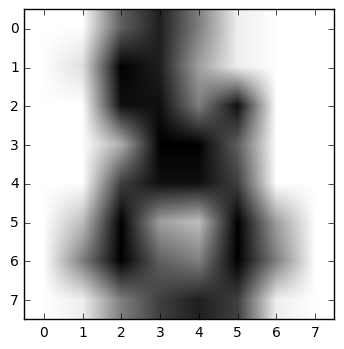

In [124]:
plt.imshow(digits.images[-1], cmap=plt.cm.gray_r)

In [130]:
digits.data.shape

(1797, 64)

In [138]:
digits.images.shape

(1797, 8, 8)

In [135]:
digits_data_mine = digits.images.reshape(digits.images.shape[0], -1)
digits_data_mine.shape

(1797, 64)

In [137]:
digits.data

array([[  0.,   0.,   5., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,  10.,   0.,   0.],
       [  0.,   0.,   0., ...,  16.,   9.,   0.],
       ..., 
       [  0.,   0.,   1., ...,   6.,   0.,   0.],
       [  0.,   0.,   2., ...,  12.,   0.,   0.],
       [  0.,   0.,  10., ...,  12.,   1.,   0.]])

In [136]:
digits_data_mine

array([[  0.,   0.,   5., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,  10.,   0.,   0.],
       [  0.,   0.,   0., ...,  16.,   9.,   0.],
       ..., 
       [  0.,   0.,   1., ...,   6.,   0.,   0.],
       [  0.,   0.,   2., ...,  12.,   0.,   0.],
       [  0.,   0.,  10., ...,  12.,   1.,   0.]])

## [Supervised learning: predicting an output variable from high-dimensional observations](http://scikit-learn.org/stable/tutorial/statistical_inference/supervised_learning.html)

### Nearest neighbor and the curse of dimensionality

In [142]:
import numpy as np
from sklearn import datasets
iris = datasets.load_iris()
iris_X = iris.data
iris_y = iris.target
np.unique(iris_y)

array([0, 1, 2])

In [144]:
iris_X.shape

(150, 4)

In [145]:
len(iris_X)

150

In [155]:
np.random.seed(0)
indices = np.random.permutation(iris_X.shape[0])
iris_X_train = iris_X[indices[:-10]]
iris_y_train = iris_y[indices[:-10]]
iris_X_test = iris_X[indices[-10:]]
iris_y_test = iris_y[indices[-10:]]

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(iris_X_train, iris_y_train)

knn.predict(iris_X_test)

iris_y_test

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

array([1, 2, 1, 0, 0, 0, 2, 1, 2, 0])

array([1, 1, 1, 0, 0, 0, 2, 1, 2, 0])

### Linear model: from regression to sparsity

#### Linear regression

In [175]:
from sklearn import datasets

diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [176]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(X_train, y_train)
regr.coef_

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

array([  31.26603057, -261.47161199,  536.8208019 ,  367.3380721 ,
       -894.42762179,  510.94604944,  266.21571483,  396.79980007,
        738.64614103,   16.1487845 ])

In [180]:
from sklearn.metrics import mean_squared_error
mean_squared_error(regr.predict(X_test), y_test)

2988.2819972437183

In [177]:
np.mean((regr.predict(X_test)-y_test)**2)

2988.2819972437183

In [178]:
regr.score(X_test, y_test)

0.46753512172191258

#### Shrinkage

In [188]:
X = np.array([ .5, 1]).reshape(2, 1)
y = [.5, 1]
test = np.array([0, 2]).reshape(2, 1)
regr = LinearRegression()

In [196]:
X

array([[ 0.5],
       [ 1. ]])

In [195]:
.1*np.random.normal(size=(2,1))

array([[ 0.07610377],
       [ 0.0121675 ]])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

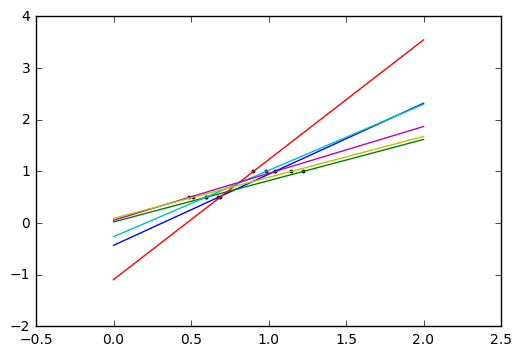

In [194]:
plt.figure()
np.random.seed(0)
for _ in range(6):
    this_X = .1*np.random.normal(size=(2,1))+X
    regr.fit(this_X, y)
    plt.plot(test, regr.predict(test))
    plt.scatter(this_X, y, s=3)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

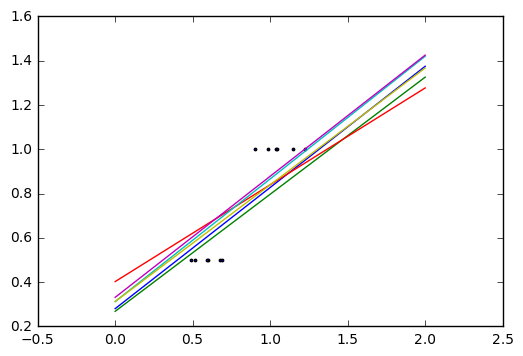

In [200]:
from sklearn.linear_model import Ridge
regr = Ridge(alpha=.1)
plt.figure() 

np.random.seed(0)
for _ in range(6): 
   this_X = .1*np.random.normal(size=(2, 1)) + X
   regr.fit(this_X, y)
   plt.plot(test, regr.predict(test)) 
   plt.scatter(this_X, y, s=3) 

In [208]:
alphas = np.logspace(-4, -1, 6)
[regr.set_params(alpha=alpha).fit(X_train, y_train).score(X_test, y_test) for alpha in alphas]

[0.46765353601102622,
 0.46797909943892801,
 0.46897219775181842,
 0.47092519511614961,
 0.47378333049901555,
 0.47602537856173266]

#### Sparsity

In [220]:
from sklearn.linear_model import Lasso
regr = Lasso()
scores = [regr.set_params(alpha=alpha).fit(X_train, y_train).score(X_test, y_test) for alpha in alphas]

In [221]:
max_score = max(scores)
best_alpha = alphas[scores.index(max_score)]
regr.set_params(alpha=best_alpha)
regr.fit(X_train, y_train)
regr.coef_

Lasso(alpha=0.10000000000000001, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Lasso(alpha=0.10000000000000001, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

array([  0.00000000e+00,  -1.59602862e+02,   5.38401449e+02,
         3.10726039e+02,  -1.87554864e+01,  -0.00000000e+00,
        -1.71741310e+02,   5.95707907e+01,   4.56576719e+02,
         6.06948901e-03])

#### Classification

In [227]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(C=1e5)

iris = datasets.load_iris()
X, y = iris.data, iris.target
clf.fit(X, y)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

Shrinkage and sparsity with logistic regression
The `C` parameter controls the amount of regularization in the `LogisticRegression` object: a large value for `C` results in less regularization. `penalty="l2"` gives Shrinkage (i.e. non-sparse coefficients), while `penalty="l1"` gives Sparsity.

### Support vector machines (SVMs)

In [233]:
from sklearn import svm
from sklearn import datasets
iris = datasets.load_iris()
X, y = iris.data, iris.target

from sklearn.cross_validation import cross_val_score
svc = svm.SVC(kernel='linear')
svc.fit(X, y)
cross_val_score(svc, X, y, cv=5)
svc.set_params(kernel='poly', degree=3)
cross_val_score(svc, X, y, cv=5)
svc.set_params(kernel='rbf')
cross_val_score(svc, X, y, cv=5)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

array([ 0.96666667,  1.        ,  0.96666667,  0.96666667,  1.        ])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

array([ 1.        ,  1.        ,  0.9       ,  0.93333333,  1.        ])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

array([ 0.96666667,  1.        ,  0.96666667,  0.96666667,  1.        ])

## [Model selection: choosing estimators and their parameters](http://scikit-learn.org/stable/tutorial/statistical_inference/settings.html)

### Score, and cross-validated scores

In [236]:
from sklearn import datasets
digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target

from sklearn import svm
svc = svm.SVC(C=1, kernel='linear')
svc.fit(X_digits[:-100], y_digits[:-100]).score(X_digits[-100:], y_digits[-100:])

0.97999999999999998

In [249]:
import numpy as np
import copy
X_folds = np.split(X_digits, 3)
y_folds = np.split(y_digits, 3)
scores = list()
for k in range(3):
    X_train = copy.copy(X_folds)
    X_test = X_train.pop(k)    
    X_train = np.concatenate(X_train)
    
    y_train = copy.copy(y_folds)
    y_test = y_train.pop(k)
    y_train = np.concatenate(y_train)
    scores.append(svc.fit(X_train, y_train).score(X_test, y_test))
scores

[0.93489148580968284, 0.95659432387312182, 0.93989983305509184]

### Cross-validation generators

In [273]:
from sklearn.model_selection import KFold, cross_val_score
# from sklearn.cross_validation import KFold, cross_val_score - deprecated
X = ["a", "a", "b", "c", "c", "c"]
k_fold = KFold(n_splits=3)
for train_indices, test_indices in k_fold.split(X):
    print(train_indices, test_indices)

[2 3 4 5] [0 1]
[0 1 4 5] [2 3]
[0 1 2 3] [4 5]


In [278]:
k_fold = KFold(n_splits=3)

from sklearn import datasets
digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target

[
    svc.fit(X_digits[train_indices], y_digits[train_indices]).score(
        X_digits[test_indices], y_digits[test_indices])
    for train_indices, test_indices in k_fold.split(X_digits)
]
# n_jobs=-1 means that the computation will be dispatched on all the CPUs of the computer.

cross_val_score(svc, X_digits, y_digits, cv=k_fold, n_jobs=-1) # same as above
cross_val_score(svc, X_digits, y_digits, cv=3) # different from above
cross_val_score(svc, X_digits, y_digits, cv=k_fold, scoring='precision_macro')

[0.93489148580968284, 0.95659432387312182, 0.93989983305509184]

array([ 0.93489149,  0.95659432,  0.93989983])

array([ 0.93521595,  0.95826377,  0.93791946])

array([ 0.93969761,  0.95911415,  0.94041254])

### Grid-search and cross-validated estimators

In [ ]:
from sklearn import datasets
digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target


from sklearn.model_selection import GridSearchCV, cross_val_score
Cs = np.logspace(-4, -1, 6)
from sklearn import svm
svc = svm.SVC()
clf = GridSearchCV(estimator=svc, param_grid=dict(C=Cs), n_jobs=-1)
clf.fit(X_digits[:-100], y_digits[:-100])
clf.best_score_
clf.best_params_

clf.score(X_digits[-100:], y_digits[-100:])

In [104]:
pd.DataFrame(clf.cv_results_)

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_C,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.394181,0.087282,0.116676,0.169731,0.0001,{u'C': 0.0001},1,0.101933,0.10195,0.146643,0.30504,0.101423,0.102203,0.006583,0.002967,0.0212,0.095678
1,0.348223,0.087034,0.116676,0.169731,0.000398107,{u'C': 0.000398107170553},1,0.101933,0.10195,0.146643,0.30504,0.101423,0.102203,0.018720,0.002015,0.0212,0.095678
2,0.345184,0.090379,0.116676,0.169731,0.00158489,{u'C': 0.00158489319246},1,0.101933,0.10195,0.146643,0.30504,0.101423,0.102203,0.016292,0.004941,0.0212,0.095678
3,0.307508,0.094966,0.116676,0.169731,0.00630957,{u'C': 0.0063095734448},1,0.101933,0.10195,0.146643,0.30504,0.101423,0.102203,0.006656,0.009710,0.0212,0.095678
4,0.547907,0.099792,0.116676,0.169731,0.0251189,{u'C': 0.0251188643151},1,0.101933,0.10195,0.146643,0.30504,0.101423,0.102203,0.002530,0.006147,0.0212,0.095678
5,0.333910,0.067630,0.116676,0.169731,0.1,{u'C': 0.1},1,0.101933,0.10195,0.146643,0.30504,0.101423,0.102203,0.134001,0.015330,0.0212,0.095678


#### Nested cross-validation

In [288]:
# By default, the GridSearchCV uses a 3-fold cross-validation. 
# However, if it detects that a classifier is passed, rather than a regressor, it uses a stratified 3-fold.
cross_val_score(clf, X_digits, y_digits)
cross_val_score(clf, X_digits, y_digits, cv=3)

from sklearn.model_selection import StratifiedKFold
k_fold = StratifiedKFold()
cross_val_score(clf, X_digits, y_digits, cv=k_fold)

from sklearn.model_selection import KFold
k_fold = KFold(n_splits=3)
cross_val_score(clf, X_digits, y_digits, cv=k_fold)

array([ 0.1013289 ,  0.10183639,  0.12919463])

array([ 0.1013289 ,  0.10183639,  0.12919463])

array([ 0.1013289 ,  0.10183639,  0.12919463])

array([ 0.0951586 ,  0.10016694,  0.0984975 ])

### Cross-validated estimators

Cross-validation to set a parameter can be done more efficiently on an algorithm-by-algorithm basis. This is why, for certain estimators, scikit-learn exposes Cross-validation: evaluating estimator performance estimators that set their parameter automatically by cross-validation:

In [294]:
from sklearn import datasets
digits = datasets.load_digits()
X = digits.data
y = digits.target
from sklearn.linear_model import LassoCV
clf = LassoCV()
clf.fit(X, y)
clf.alpha_

LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

0.0840713777081145

## [Unsupervised learning: seeking representations of the data](http://scikit-learn.org/stable/tutorial/statistical_inference/unsupervised_learning.html)

### Clustering: grouping observations together

#### K-means clustering

In [314]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target

from sklearn import cluster
kmeans = cluster.KMeans(n_clusters=3)
kmeans.fit(X)

kmeans.labels_[::10]
y[::10]


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

array([1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0], dtype=int32)

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2])

#### Application example: vector quantization

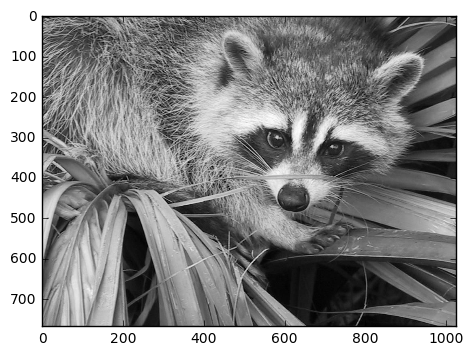

In [365]:
import scipy as sp
face = sp.misc.face(gray=True)

plt.imshow(face, cmap=plt.cm.gray)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=1, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

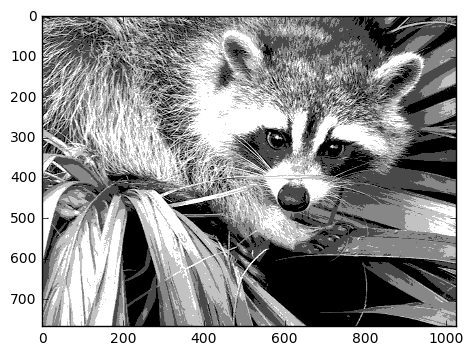

In [364]:
X = face.reshape((-1, 1))

from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=5, n_init=1)
k_means.fit(X)

values = k_means.cluster_centers_.reshape(-1,)

labels = k_means.labels_

X_compressed = values[labels]
face_compressed = X_compressed.reshape(face.shape)
plt.imshow(face_compressed, cmap=plt.cm.gray)

#### Hierarchical agglomerative clustering: Ward

(768, 1024)

(76, 102)

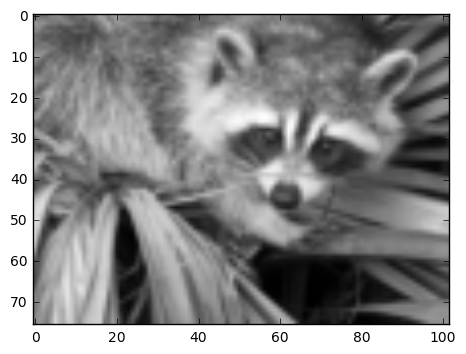

In [378]:
import scipy as sp
face = sp.misc.face(gray=True)
face.shape
face = sp.misc.imresize(face, 0.1)/255.
face.shape
plt.imshow(foo, cmap=plt.cm.gray)

# ?????
from sklearn.feature_extraction.image import grid_to_graph
from sklearn.cluster import AgglomerativeClustering


In [420]:
# Demo grid_to_graph
from sklearn.feature_extraction.image import grid_to_graph
connectivity = grid_to_graph(2, 3)
connectivity
connectivity_dense = connectivity.todense()
connectivity_dense.shape
import pandas as pd
pd.options.display.max_columns = None
pd.DataFrame(connectivity_dense)

<6x6 sparse matrix of type '<type 'numpy.int64'>'
	with 20 stored elements in COOrdinate format>

(6, 6)

,0,1,2,3,4,5
0,1,1,0,1,0,0
1,1,1,1,0,1,0
2,0,1,1,0,0,1
3,1,0,0,1,1,0
4,0,1,0,1,1,1
5,0,0,1,0,1,1


In [418]:
digits = datasets.load_digits()
images = digits.images
# images.shape
X = images.reshape(images.shape[0], -1)
# X.shape
connectivity = grid_to_graph(*images[0].shape)

from sklearn import cluster
agglo = cluster.FeatureAgglomeration(connectivity=connectivity, n_clusters=32)
agglo.fit(X)

X_reduced = agglo.transform(X)
X_approx = agglo.inverse_transform(X_reduced)

images_approx = X_approx.reshape(images.shape)

FeatureAgglomeration(affinity='euclidean', compute_full_tree='auto',
           connectivity=<64x64 sparse matrix of type '<type 'numpy.int64'>'
	with 288 stored elements in COOrdinate format>,
           linkage='ward', memory=Memory(cachedir=None), n_clusters=32,
           pooling_func=<function mean at 0x10944f7d0>)

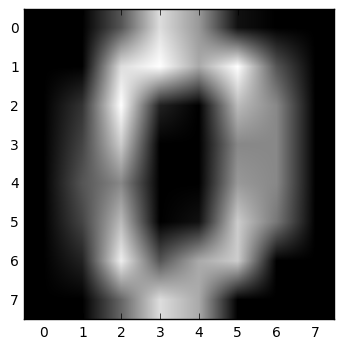

In [419]:
plt.imshow(images[0], cmap=plt.cm.gray)

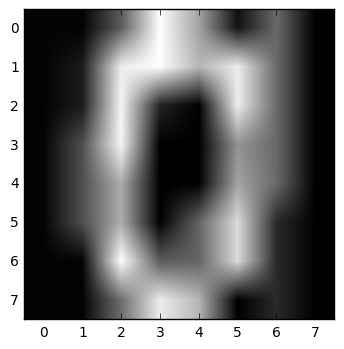

In [398]:
plt.imshow(images_approx[0], cmap=plt.cm.gray)

### Decompositions: from a signal to components and loadings

#### Principal component analysis: PCA

In [503]:
n = 100
x1 = np.random.rand(n,1)
x2 = np.random.rand(n,1)
x3 = x1 + x2 + 0.1*np.random.rand(n,1)
X = np.concatenate([x1, x2, x3], axis=1)

In [504]:
from sklearn import decomposition
pca = decomposition.PCA()
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [505]:
pca.explained_variance_
pca.explained_variance_.cumsum()

array([ 0.22329064,  0.07914909,  0.00026574])

array([ 0.22329064,  0.30243973,  0.30270546])

In [506]:
pca.explained_variance_ratio_
pca.explained_variance_ratio_.cumsum()

array([ 0.73764984,  0.26147228,  0.00087788])

array([ 0.73764984,  0.99912212,  1.        ])

In [507]:
pca.n_components_

3

In [508]:
pca.n_components is None
pca.n_components = 2
pca.n_components
pca.n_components_

True

2

3

In [509]:
X_reduced = pca.fit_transform(X)
X_reduced.shape

(100, 2)

#### Independent Component Analysis: ICA

In [539]:
time = np.linspace(0, 10, 2000)
s1 = np.sin(2 * time)
s2 = np.sign(np.sin(3*time))
S = np.c_[s1, s2]
S += 0.2*np.random.normal(size=S.shape)
S /= S.std(axis=0)

In [538]:
# Mix data
A = np.array([[1, 1], [0.5, 2]])  # Mixing matrix

X = np.dot(S, A.T)

In [547]:
from sklearn import decomposition
ica = decomposition.FastICA()
S_ = ica.fit_transform(X)
A_ = ica.mixing_
np.allclose(X, np.dot(S_, A_.T) + ica.mean_)

True

## [Putting it all together](http://scikit-learn.org/stable/tutorial/statistical_inference/putting_together.html)

### Pipelining

In [561]:
from sklearn import datasets, linear_model, decomposition
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

clf = linear_model.LogisticRegression()
pca = decomposition.PCA()
pipe = Pipeline(steps=[('pca', pca), ('clf', clf)])

In [ ]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

In [567]:
pca.fit(X)
pca.explained_variance_.shape
n_components = [20, 40, 64]

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

(64,)

In [568]:
Cs = np.logspace(-4, 4, 3)

In [569]:
estimator = GridSearchCV(pipe, dict(pca__n_components=n_components, clf__C=Cs))
estimator.fit(X, y)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('clf', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'pca__n_components': [20, 40, 64], 'clf__C': array([  1.00000e-04,   1.00000e+00,   1.00000e+04])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [573]:
estimator.best_estimator_

Pipeline(steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('clf', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [574]:
estimator.best_estimator_.named_steps

{'clf': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
           penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
           verbose=0, warm_start=False),
 'pca': PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
   svd_solver='auto', tol=0.0, whiten=False)}

### Face recognition with eigenfaces

TODO

# Working With Text Data

## Getting data

In [15]:
from sklearn.datasets import fetch_20newsgroups
categories = [
    'alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med'
]
twenty_train = fetch_20newsgroups(subset='train',
    categories=categories, shuffle=True, random_state=42)
twenty_train['target_names']
twenty_train.target_names

['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']

['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']

In [16]:
print twenty_train.data[0]

From: sd345@city.ac.uk (Michael Collier)
Subject: Converting images to HP LaserJet III?
Nntp-Posting-Host: hampton
Organization: The City University
Lines: 14

Does anyone know of a good way (standard PC application/PD utility) to
convert tif/img/tga files into LaserJet III format.  We would also like to
do the same, converting to HPGL (HP plotter) files.

Please email any response.

Is this the correct group?

Thanks in advance.  Michael.
-- 
Michael Collier (Programmer)                 The Computer Unit,
Email: M.P.Collier@uk.ac.city                The City University,
Tel: 071 477-8000 x3769                      London,
Fax: 071 477-8565                            EC1V 0HB.



In [17]:
twenty_train.target_names[twenty_train.target[0]]

'comp.graphics'

## Create feature from text

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(twenty_train.data)

In [19]:
len(twenty_train.data)

2257

In [20]:
X_train_counts.shape

(2257, 35788)

In [21]:
import numpy as np
import pandas as pd
X_train_counts[0].todense().sum()
pd.Series(np.array(X_train_counts[0].todense()).reshape(-1,)).value_counts()

98

0    35715
1       57
2       11
4        2
3        2
5        1
dtype: int64

In [22]:
from sklearn.feature_extraction.text import TfidfTransformer
tf_transformer = TfidfTransformer(use_idf=False).fit(X_train_counts)
X_train_tf = tf_transformer.transform(X_train_counts)
X_train_tf.shape

(2257, 35788)

In [23]:
pd.Series(np.array(X_train_tf[0].todense()).reshape(-1,)).value_counts()

0.000000    35715
0.075378       57
0.150756       11
0.226134        2
0.301511        2
0.376889        1
dtype: int64

In [24]:
X_train_tf = TfidfTransformer(use_idf=False).fit_transform(X_train_counts)
X_train_tf.shape

(2257, 35788)

In [25]:
tfidf_tranformer = TfidfTransformer()
X_train_tfidf = tfidf_tranformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(2257, 35788)

In [26]:
pd.Series(np.array(X_train_tfidf[0].todense()).reshape(-1,)).value_counts()

0.000000    35715
0.134871        5
0.246455        2
0.068661        2
0.016798        2
0.123228        2
0.196228        1
0.078021        1
0.049102        1
0.054174        1
0.063506        1
0.093130        1
0.031095        1
0.097963        1
0.086319        1
0.125601        1
0.036044        1
0.018250        1
0.124918        1
0.113827        1
0.034783        1
0.384180        1
0.039004        1
0.035904        1
0.043162        1
0.059662        1
0.065676        1
0.119479        1
0.018945        1
0.109606        1
            ...  
0.078308        1
0.068991        1
0.076919        1
0.066665        1
0.099941        1
0.136358        1
0.173585        1
0.074444        1
0.034481        1
0.034291        1
0.045253        1
0.019965        1
0.017762        1
0.072838        1
0.102184        1
0.186260        1
0.037793        1
0.042704        1
0.049672        1
0.016865        1
0.118197        1
0.215672        1
0.049359        1
0.088654        1
0.084975  

## Training a classifier

In [44]:
X_train_tfidf

<2257x35788 sparse matrix of type '<type 'numpy.float64'>'
	with 365886 stored elements in Compressed Sparse Row format>

In [43]:
twenty_train.target

array([1, 1, 3, ..., 2, 2, 2])

In [27]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_tfidf, twenty_train.target)

In [33]:
docs_new = ['God is love', 'OpenGL on the GPU is fast']
X_test_tfidf = tfidf_tranformer.transform(count_vect.transform(docs_new))
pred = clf.predict(X_test_tfidf)
np.array(twenty_train.target_names)[pred]

array(['soc.religion.christian', 'comp.graphics'], 
      dtype='|S22')

In [34]:
pred

array([3, 1])

## Building a pipeline

In [36]:
from sklearn.pipeline import make_pipeline
pipeline = make_pipeline(CountVectorizer(), TfidfTransformer(), MultinomialNB())
pipeline.fit(twenty_train.data, twenty_train.target)
pred = pipeline.predict(docs_new)

Pipeline(steps=[('countvectorizer', CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,...      use_idf=True)), ('multinomialnb', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [37]:
np.array(twenty_train.target_names)[pred]

array(['soc.religion.christian', 'comp.graphics'], 
      dtype='|S22')

In [38]:
twenty_test = fetch_20newsgroups(subset='test',
    categories=categories, shuffle=True, random_state=42)
docs_test = twenty_test.data
pred = pipeline.predict(docs_test)
from sklearn.metrics import accuracy_score
accuracy_score(pred, twenty_test.target)

0.83488681757656458

This is svm classifier.

In [39]:
from sklearn.linear_model import SGDClassifier
pipeline = make_pipeline(
    CountVectorizer(),
    TfidfTransformer(),
    SGDClassifier(
        loss='hinge', penalty='l2', alpha=1e-3, n_iter=5, random_state=42))
pipeline.fit(twenty_train.data, twenty_train.target)
pred = pipeline.predict(docs_test)
accuracy_score(pred, twenty_test.target)

Pipeline(steps=[('countvectorizer', CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,...     penalty='l2', power_t=0.5, random_state=42, shuffle=True, verbose=0,
       warm_start=False))])

0.9127829560585885

This is also svm, but perform badly. 
TODO - find out why and how make it perform as well as above.

In [40]:
from sklearn.svm import SVC
pipeline = make_pipeline(CountVectorizer(), TfidfTransformer(), SVC())
pipeline.fit(twenty_train.data, twenty_train.target)
pred = pipeline.predict(docs_test)
accuracy_score(pred, twenty_test.target)

Pipeline(steps=[('countvectorizer', CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,...,
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

0.26498002663115844

In [41]:
??SVC

In [42]:
from sklearn.svm import SVC
pipeline = make_pipeline(CountVectorizer(), TfidfTransformer(), 
                         SVC())
pipeline.fit(twenty_train.data, twenty_train.target)
pred = pipeline.predict(docs_test)
accuracy_score(pred, twenty_test.target)

Pipeline(steps=[('countvectorizer', CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,...,
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

0.26498002663115844